<b>Advanced Hyper-parameters Optimization</b>: minization of functions
Using <b>Bayesian optimization with Gussian Process</b>.


In [2]:
import numpy as np
import pandas as pd
from functools import partial
from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection
from skopt import gp_minimize
from skopt import space

In [6]:
def optimize(params,param_names,x,y):
    params = dict(zip(param_names,params))
    model = ensemble.RandomForestClassifier(**params)
    kf = model_selection.StratifiedKFold(n_splits=5)
    accuracies = []
    for idx in kf.split(X=x,y=y):
        train_idx, test_idx = idx[0], idx[1]
        xtrain = x[train_idx]
        ytrain = y[train_idx]
        xtest = x[test_idx]
        ytest = y[test_idx]
        # fit model for current fold
        model.fit(xtrain, ytrain)
        #create predictions
        preds = model.predict(xtest)
        # calculate and append accuracy
        fold_accuracy = metrics.accuracy_score(
        ytest,
        preds
        )
        accuracies.append(fold_accuracy)
    # return negative accuracy
    return -1 * np.mean(accuracies)

if __name__ == "__main__":
    df = pd.read_csv("input/mobile_train.csv")
    X = df.drop("price_range",axis=1).values
    y = df.price_range.values
    param_space = [
        space.Integer(3,15,name="max_depth"),
        space.Integer(100,1500,name="n_estimators"),
        space.Categorical(['gini','entropy'],name="criterion"),
        space.Real(0.01,1,prior="uniform",name="max_features"),
    ]
    param_names = [
        "max_depth",
        "n_estimators",
        "criterion",
        "max_features"
        ]
    optimization_function = partial(
        optimize,
        param_names=param_names,
        x=X,
        y=y
        )
    result = gp_minimize(
        optimization_function,
        dimensions=param_space,
        n_calls=15,
        n_random_starts=10,
        verbose=10
        )
    best_params = dict(
        zip(
            param_names,
            result.x
            )
        )
    print(best_params)


Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 2.6512
Function value obtained: -0.7480
Current minimum: -0.7480
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 10.2251
Function value obtained: -0.9105
Current minimum: -0.9105
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 3.0064
Function value obtained: -0.8550
Current minimum: -0.9105
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 7.8102
Function value obtained: -0.7000
Current minimum: -0.9105
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 11.4262
Function value obtained: -0.8330
Current minimum: -0.9105
Iteration No: 6 started

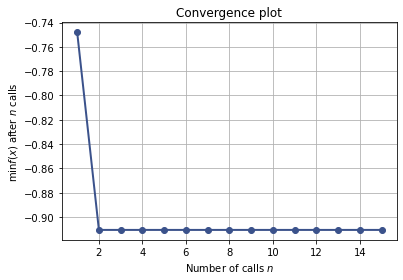

In [7]:
from skopt.plots import plot_convergence
plot_convergence(result)

There are various libraries for hyper-parameter optimization.
1. Scikit-optimize - used here  
2. hyperopt - Tree structured Parzen Estimator (TPE)
